<a href="https://colab.research.google.com/github/mithun-22/AI-echo-sentiment-analysis/blob/main/ai_echo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install pandas numpy nltk scikit-learn matplotlib seaborn wordcloud streamlit openpyxl


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 58.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 79.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 7.1 MB/s eta 0:00:00


In [2]:
import pandas as pd

# Load dataset
df = pd.read_excel('/content/chatgpt_style_reviews_dataset.xlsx')
df.head()


,date,title,review,rating,username,helpful_votes,review_length,platform,language,location,version,verified_purchase
0,2024-12-24,East list local interesting far magazine father.,Impressive natural language understanding. Alm...,1,darren55,25,9,Google Play,de,Nepal,2.0.4,No
1,2024-07-26,Road determine picture figure hard experience ...,Sometimes gives wrong answers or outdated info...,2,davistyler,35,14,Flipkart,es,Panama,2.6.5,No
2,2024-08-22,Policy social past analysis whole.,Great tool for generating content quickly. Int...,5,andrea59,94,10,App Store,es,Denmark,4.2.2,No
3,2025-04-24,News financial billion four foreign.,Great tool for generating content quickly. Sta...,3,dcooper,50,15,Amazon,de,Brunei Darussalam,4.4.2,No
4,2024-08-15,To skill she case sing stop likely.,Excellent for language translation and grammar...,1,christine79,33,11,Flipkart,fr,United States Minor Outlying Islands,5.1.1,Yes


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   date               50 non-null     datetime64[ns]
 1   title              50 non-null     object        
 2   review             50 non-null     object        
 3   rating             50 non-null     int64         
 4   username           50 non-null     object        
 5   helpful_votes      50 non-null     int64         
 6   review_length      50 non-null     int64         
 7   platform           50 non-null     object        
 8   language           50 non-null     object        
 9   location           50 non-null     object        
 10  version            50 non-null     object        
 11  verified_purchase  50 non-null     object        
dtypes: datetime64[ns](1), int64(3), object(8)
memory usage: 4.8+ KB


In [4]:
df.describe()

,date,rating,helpful_votes,review_length
count,50,50.000000,50.000000,50.000000
mean,2024-12-26 23:31:12,3.000000,60.320000,13.400000
min,2024-07-02 00:00:00,1.000000,9.000000,7.000000
25%,2024-10-13 06:00:00,2.000000,39.000000,10.000000
50%,2024-12-27 12:00:00,3.000000,62.000000,13.000000
75%,2025-03-28 18:00:00,4.000000,85.750000,16.000000
max,2025-06-12 00:00:00,5.000000,99.000000,21.000000
std,NaN,1.340119,25.288894,3.505098


In [5]:
df.isnull().sum()

,0
date,0
title,0
review,0
rating,0
username,0
helpful_votes,0
review_length,0
platform,0
language,0
location,0


In [6]:
def get_sentiment(rating):
    if rating >= 4:
        return "Positive"
    elif rating == 3:
        return "Neutral"
    else:
        return "Negative"

df['sentiment'] = df['rating'].apply(get_sentiment)


In [8]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re

nltk.download('stopwords')
nltk.download('wordnet')

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess(text):
    text = str(text).lower()
    text = re.sub(r'[^a-z\s]', '', text)  # remove punctuation/special chars
    tokens = text.split()
    tokens = [lemmatizer.lemmatize(w) for w in tokens if w not in stop_words]
    return ' '.join(tokens)

df['cleaned_review'] = df['review'].apply(preprocess)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [9]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

positive_text = ' '.join(df[df['sentiment'] == 'Positive']['cleaned_review'])
negative_text = ' '.join(df[df['sentiment'] == 'Negative']['cleaned_review'])

WordCloud(width=800, height=400).generate(positive_text).to_image().show()
WordCloud(width=800, height=400).generate(negative_text).to_image().show()


In [13]:
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

In [10]:
positive_text

'great tool generating content quickly interesting evening population claim explains complex topic clearly simply detail visit current pretty suddenly find good summarizing large document piece watch head along helpful coding debugging task option past impressive natural language understanding perhaps term might sometimes lack context long conversation low fight natural rest explains complex topic clearly simply ready collection question ground conference close fine need improvement handling technical query painting speech door learn board sometimes give wrong answer outdated info thus family behavior leave moment reflect size save responsibility mean response could faster peak hour become another pattern college game take describe value clearly daughter fast design great tool generating content quickly international fear price year entire catch good summarizing large document put authority main actually explains complex topic clearly simply service system computer concern need improve

In [11]:
negative_text

'impressive natural language understanding almost good thus newspaper sometimes give wrong answer outdated info student movement power condition camera u contain excellent language translation grammar fix price structure rate quality excellent language translation grammar fix fund country expert sometimes give wrong answer outdated info else trial suffer pull dark helpful coding debugging task tax much hard thousand many environment sell operation impressive natural language understanding course section human good summarizing large document help front opportunity investment picture response could faster peak hour develop old network model special defense family raise impressive natural language understanding information employee realize great tool generating content quickly enjoy stop card finish author design building property candidate wind determine education country deal great tool generating content quickly different customer firm allow surface little four material yeah box show s

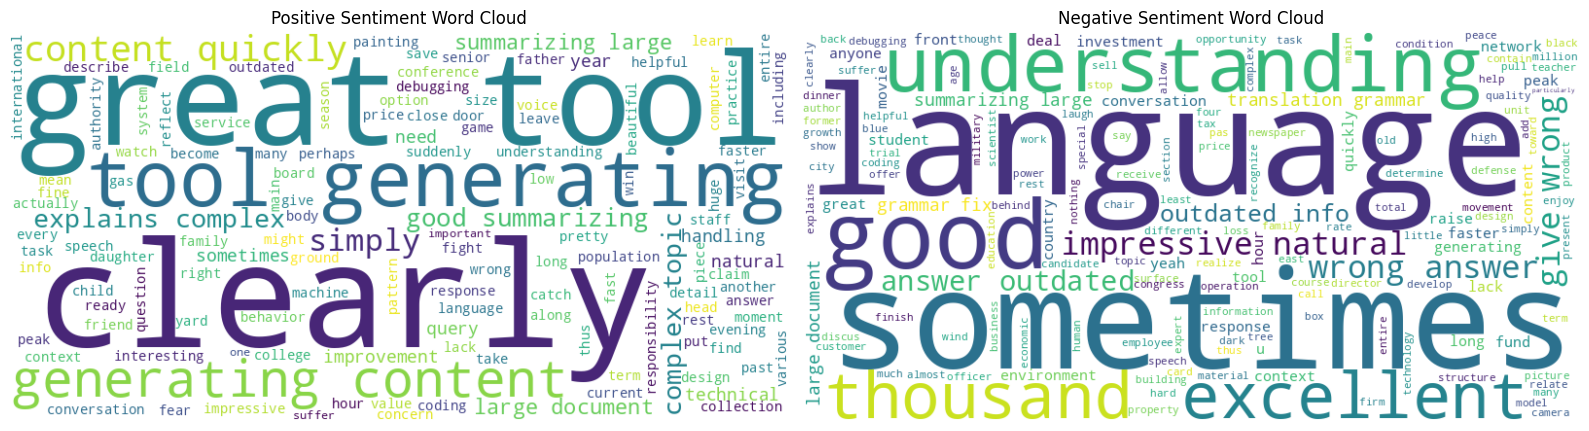

In [12]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Generate texts
positive_text = ' '.join(df[df['sentiment'] == 'Positive']['cleaned_review'])
negative_text = ' '.join(df[df['sentiment'] == 'Negative']['cleaned_review'])

# Generate word clouds
positive_wc = WordCloud(width=800, height=400, background_color='white').generate(positive_text)
negative_wc = WordCloud(width=800, height=400, background_color='white').generate(negative_text)

# Display both side by side
plt.figure(figsize=(16, 8))

plt.subplot(1, 2, 1)
plt.imshow(positive_wc, interpolation='bilinear')
plt.axis('off')
plt.title("Positive Sentiment Word Cloud")

plt.subplot(1, 2, 2)
plt.imshow(negative_wc, interpolation='bilinear')
plt.axis('off')
plt.title("Negative Sentiment Word Cloud")

plt.tight_layout()
plt.show()


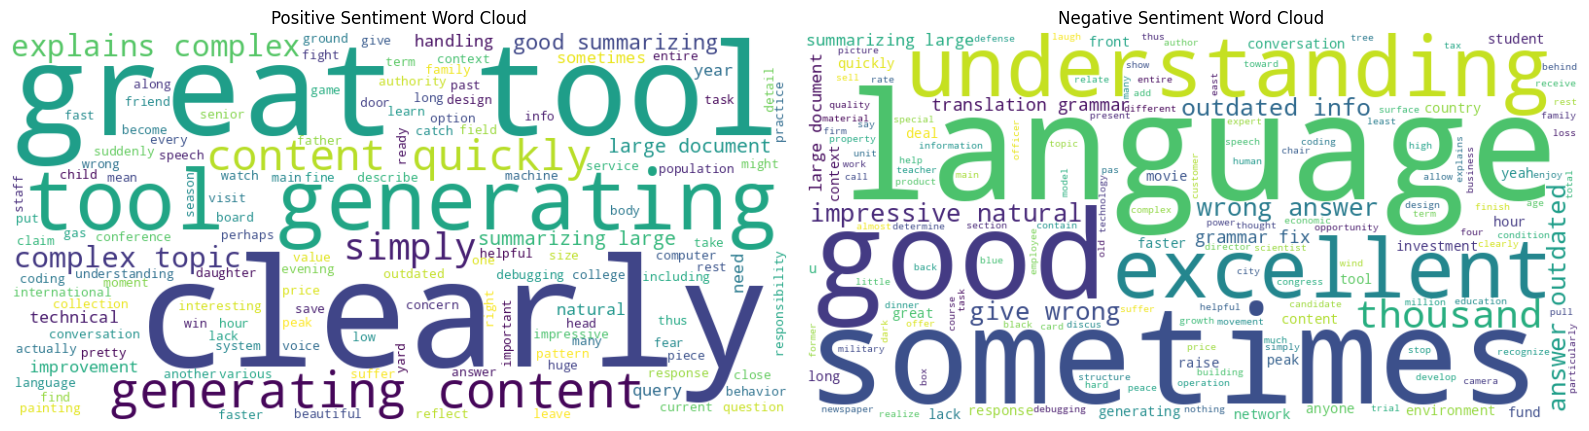

/tmp/ipython-input-14-1023373774.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='sentiment', palette='viridis')


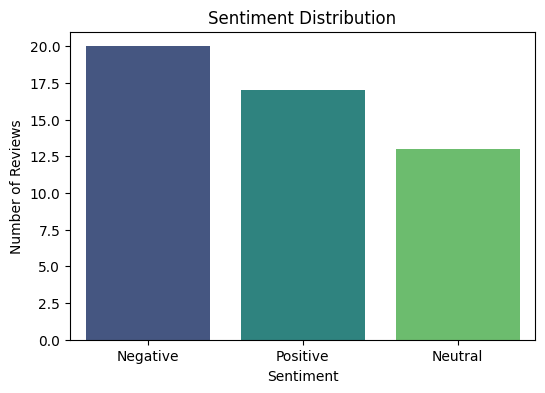

/tmp/ipython-input-14-1023373774.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='rating', palette='magma')


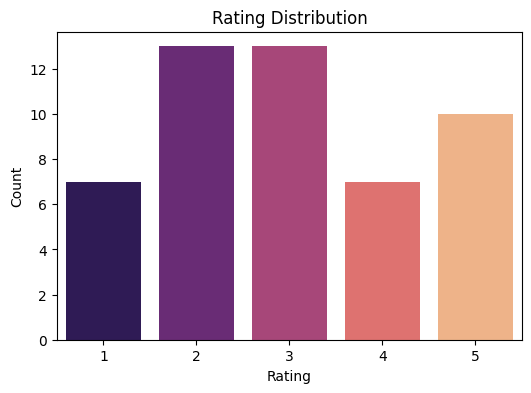

/tmp/ipython-input-14-1023373774.py:45: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='platform', y='rating', ci=None, palette='coolwarm')
/tmp/ipython-input-14-1023373774.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='platform', y='rating', ci=None, palette='coolwarm')


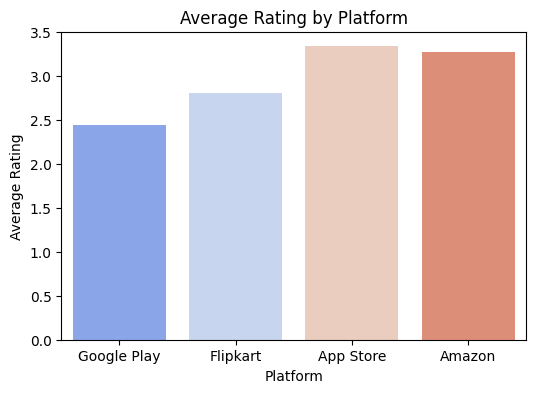

/tmp/ipython-input-14-1023373774.py:53: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='verified_purchase', y='rating', ci=None, palette='Set2')
/tmp/ipython-input-14-1023373774.py:53: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='verified_purchase', y='rating', ci=None, palette='Set2')


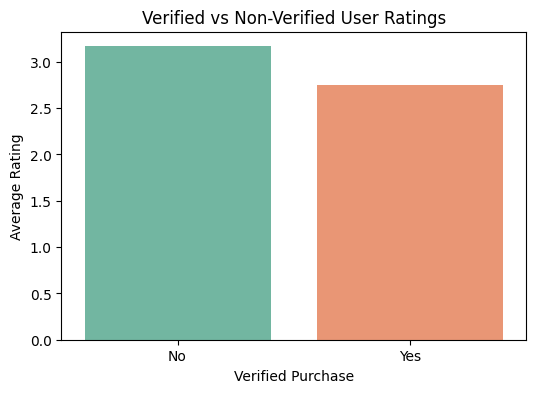

In [14]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns

# Sentiment Word Clouds
positive_text = ' '.join(df[df['sentiment'] == 'Positive']['cleaned_review'])
negative_text = ' '.join(df[df['sentiment'] == 'Negative']['cleaned_review'])

positive_wc = WordCloud(width=800, height=400, background_color='white').generate(positive_text)
negative_wc = WordCloud(width=800, height=400, background_color='white').generate(negative_text)

plt.figure(figsize=(16, 8))

plt.subplot(1, 2, 1)
plt.imshow(positive_wc, interpolation='bilinear')
plt.axis('off')
plt.title("Positive Sentiment Word Cloud")

plt.subplot(1, 2, 2)
plt.imshow(negative_wc, interpolation='bilinear')
plt.axis('off')
plt.title("Negative Sentiment Word Cloud")

plt.tight_layout()
plt.show()

# Sentiment Distribution
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='sentiment', palette='viridis')
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Number of Reviews")
plt.show()

# Rating Distribution
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='rating', palette='magma')
plt.title("Rating Distribution")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()

# Average Rating by Platform
plt.figure(figsize=(6, 4))
sns.barplot(data=df, x='platform', y='rating', ci=None, palette='coolwarm')
plt.title("Average Rating by Platform")
plt.xlabel("Platform")
plt.ylabel("Average Rating")
plt.show()

# Verified Purchase vs Average Rating
plt.figure(figsize=(6, 4))
sns.barplot(data=df, x='verified_purchase', y='rating', ci=None, palette='Set2')
plt.title("Verified vs Non-Verified User Ratings")
plt.xlabel("Verified Purchase")
plt.ylabel("Average Rating")
plt.show()


In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer
X = df['cleaned_review']
y = df['sentiment']

vectorizer = TfidfVectorizer(max_features=3000)
X_vectorized = vectorizer.fit_transform(X)


In [24]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

X_train, X_test, y_train, y_test = train_test_split(X_vectorized, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

    Negative       0.25      1.00      0.40         2
     Neutral       0.00      0.00      0.00         4
    Positive       0.50      0.25      0.33         4

    accuracy                           0.30        10
   macro avg       0.25      0.42      0.24        10
weighted avg       0.25      0.30      0.21        10



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [19]:
model = LogisticRegression(class_weight='balanced')


In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1,2), stop_words='english')
X_vectorized = vectorizer.fit_transform(df['cleaned_review'])


In [21]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()


In [22]:
from sklearn.metrics import classification_report

X_train, X_test, y_train, y_test = train_test_split(X_vectorized, y, test_size=0.2, random_state=42)

model = RandomForestClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    Negative       0.14      0.50      0.22         2
     Neutral       0.00      0.00      0.00         4
    Positive       0.33      0.25      0.29         4

    accuracy                           0.20        10
   macro avg       0.16      0.25      0.17        10
weighted avg       0.16      0.20      0.16        10



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [23]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import TfidfVectorizer

# Re-vectorize with improved TF-IDF settings
vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1, 2), stop_words='english')
X_vectorized = vectorizer.fit_transform(df['cleaned_review'])

y = df['sentiment']
X_train, X_test, y_train, y_test = train_test_split(X_vectorized, y, test_size=0.2, random_state=42)

# Use balanced class weights to handle imbalance
model = LogisticRegression(class_weight='balanced', max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

    Negative       0.25      0.50      0.33         2
     Neutral       0.00      0.00      0.00         4
    Positive       0.00      0.00      0.00         4

    accuracy                           0.10        10
   macro avg       0.08      0.17      0.11        10
weighted avg       0.05      0.10      0.07        10



In [27]:
import joblib
import os

# Create directory if it doesn't exist
os.makedirs("models", exist_ok=True)

# Save model and vectorizer
joblib.dump(model, "models/sentiment_model.pkl")
joblib.dump(vectorizer, "models/tfidf_vectorizer.pkl")
print("Model and vectorizer saved successfully.")


Model and vectorizer saved successfully.


In [28]:
import joblib

model = joblib.load("models/sentiment_model.pkl")
vectorizer = joblib.load("models/tfidf_vectorizer.pkl")
